In [5]:
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.__version__

'0.25.1'

In [6]:
#Read the csv file
cust_df = pd.read_csv('/Users/abhijitsanyal/Documents/Merrimack_College_Faculty/Data_Exploration/Data_Exploration_Fall_2019/Module 5/Customer_Dataset_File.csv',index_col="CustomerID")

In [4]:
#Head or printout of the first 5 records
cust_df.head(5)

Region TownSize  Gender  Age  EducationYears   JobCategory  \
CustomerID                                                                    
3964-QJWTRG-NPN       1        2  Female   20              15  Professional   
0648-AIPJSP-UVM       5        5    Male   22              17         Sales   
5195-TLUDJE-HVO       3        4  Female   67              14         Sales   
4459-VLPQUH-3OL       4        3    Male   23              16         Sales   
8158-SMTQFB-CNO       2        2    Male   26              16         Sales   

                UnionMember  EmploymentLength Retired      HHIncome  ...  \
CustomerID                                                           ...   
3964-QJWTRG-NPN         Yes                 0      No   $31,000.00   ...   
0648-AIPJSP-UVM          No                 0      No   $15,000.00   ...   
5195-TLUDJE-HVO          No                16      No   $35,000.00   ...   
4459-VLPQUH-3OL          No                 0      No   $20,000.00   ...   
8158-SMTQFB-CNO          No                 1      No   $23,000.00   ...   

                 CallWait  CallForward  ThreeWayCalling EBilling  \
CustomerID                                                         
3964-QJWTRG-NPN       Yes          Yes              Yes       No   
0648-AIPJSP-UVM        No          Yes               No      Yes   
5195-TLUDJE-HVO        No           No               No       No   
4459-VLPQUH-3OL        No           No               No      Yes   
8158-SMTQFB-CNO       Yes          Yes              Yes       No   

                TVWatchingHours  OwnsPC  OwnsMobileDevice  OwnsGameSystem  \
CustomerID                                                                  
3964-QJWTRG-NPN              13      No               Yes             Yes   
0648-AIPJSP-UVM              18     Yes               Yes             Yes   
5195-TLUDJE-HVO              21      No                No              No   
4459-VLPQUH-3OL              26     Yes               Yes             Yes   
8158-SMTQFB-CNO              27     Yes                No             Yes   

                 OwnsFax  NewsSubscriber  
CustomerID                                
3964-QJWTRG-NPN       No              No  
0648-AIPJSP-UVM      Yes             Yes  
5195-TLUDJE-HVO       No             Yes  
4459-VLPQUH-3OL       No             Yes  
8158-SMTQFB-CNO       No              No  

[5 rows x 58 columns]

In [7]:
#Tail or printout of the last 5 records
cust_df.tail(5)

Region TownSize  Gender  Age  EducationYears   JobCategory  \
CustomerID                                                                    
3675-GZFGOT-QJN       2        2    Male   68              10  Professional   
4699-LEPCCE-3UD       3        3    Male   51              14  Professional   
8485-LLUICH-CVV       4        5    Male   75              17  Professional   
9325-URAAUT-7FA       1        1    Male   47              19         Sales   
8027-EXDZBF-OGR       3        5  Female   41              10        Crafts   

                UnionMember  EmploymentLength Retired       HHIncome  ...  \
CustomerID                                                            ...   
3675-GZFGOT-QJN          No                24      No   $196,000.00   ...   
4699-LEPCCE-3UD          No                 6      No    $83,000.00   ...   
8485-LLUICH-CVV          No                24      No   $108,000.00   ...   
9325-URAAUT-7FA          No                 3      No   $189,000.00   ...   
8027-EXDZBF-OGR          No                20      No    $77,000.00   ...   

                 CallWait  CallForward  ThreeWayCalling EBilling  \
CustomerID                                                         
3675-GZFGOT-QJN        No           No               No       No   
4699-LEPCCE-3UD       Yes          Yes              Yes       No   
8485-LLUICH-CVV       Yes          Yes              Yes       No   
9325-URAAUT-7FA        No           No               No      Yes   
8027-EXDZBF-OGR        No           No               No       No   

                TVWatchingHours  OwnsPC  OwnsMobileDevice  OwnsGameSystem  \
CustomerID                                                                  
3675-GZFGOT-QJN              19      No                No              No   
4699-LEPCCE-3UD              14      No                No              No   
8485-LLUICH-CVV              16      No                No              No   
9325-URAAUT-7FA              24     Yes               Yes             Yes   
8027-EXDZBF-OGR              19      No                No              No   

                 OwnsFax  NewsSubscriber  
CustomerID                                
3675-GZFGOT-QJN       No             Yes  
4699-LEPCCE-3UD       No              No  
8485-LLUICH-CVV       No             Yes  
9325-URAAUT-7FA       No             Yes  
8027-EXDZBF-OGR       No              No  

[5 rows x 58 columns]

In [8]:
#Checking customer data types
cust_df.dtypes

Region                   int64
TownSize                object
Gender                  object
Age                      int64
EducationYears           int64
JobCategory             object
UnionMember             object
EmploymentLength         int64
Retired                 object
HHIncome                object
DebtToIncomeRatio      float64
CreditDebt             float64
OtherDebt              float64
LoanDefault             object
MaritalStatus           object
HouseholdSize          float64
NumberPets             float64
NumberCats             float64
NumberDogs             float64
NumberBirds            float64
HomeOwner              float64
CarsOwned                int64
CarOwnership            object
CarBrand                object
CarValue                object
CommuteTime             object
PoliticalPartyMem       object
Votes                   object
CreditCard              object
CardTenure               int64
CardItemsMonthly         int64
CardSpendMonth          object
ActiveLi

In [9]:
#Dimensions of the data and investigate if there are any duplicate rows
cust_df.shape

(5000, 58)

In [8]:
#Rows containing duplicate data
duplicate_rows_cust_df = cust_df[cust_df.duplicated()]
print('number of duplicate rows:', duplicate_rows_cust_df.shape)

number of duplicate rows: (0, 58)


In [10]:
# Used to count the number of rows before any data manipulation
cust_df.count() 

Region                 5000
TownSize               5000
Gender                 4967
Age                    5000
EducationYears         5000
JobCategory            4985
UnionMember            5000
EmploymentLength       5000
Retired                5000
HHIncome               5000
DebtToIncomeRatio      5000
CreditDebt             5000
OtherDebt              5000
LoanDefault            5000
MaritalStatus          5000
HouseholdSize          4992
NumberPets             4994
NumberCats             4993
NumberDogs             4992
NumberBirds            4966
HomeOwner              4987
CarsOwned              5000
CarOwnership           5000
CarBrand               5000
CarValue               5000
CommuteTime            5000
PoliticalPartyMem      5000
Votes                  5000
CreditCard             5000
CardTenure             5000
CardItemsMonthly       5000
CardSpendMonth         5000
ActiveLifestyle        5000
PhoneCoTenure          5000
VoiceLastMonth         5000
VoiceOverTenure     

In [10]:
# Dropping the duplicates - not relevant here
cust_df = cust_df.drop_duplicates()

In [11]:
# Finding the null values for each column
print(cust_df.isnull().sum())

Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRental         0
EquipmentLastMonth      0
EquipmentOve

In [12]:
def num_missing(x):
  return sum(x.isnull())
#Applying per column:
print(cust_df.apply(num_missing, axis=0))

Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRental         0
EquipmentLastMonth      0
EquipmentOve

In [13]:
# Dropping the missing values. Not relevant here
# cust_df = cust_df.dropna() 
# cust_df.count()

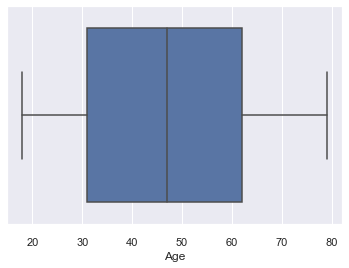

In [12]:
sns.boxplot(x = cust_df['Age'])

In [15]:
#Calculate summary statistics
summary = cust_df.describe()
summary = summary.transpose()
summary.head()

count      mean        std   min   25%   50%   75%   max
Region             5000.0   3.00140   1.421760   1.0   2.0   3.0   4.0   5.0
Age                5000.0  47.02560  17.770338  18.0  31.0  47.0  62.0  79.0
EducationYears     5000.0  14.54300   3.281083   6.0  12.0  14.0  17.0  23.0
EmploymentLength   5000.0   9.73040   9.690929   0.0   2.0   7.0  15.0  52.0
DebtToIncomeRatio  5000.0   9.95416   6.399783   0.0   5.1   8.8  13.6  43.1

In [16]:
#Another way to get meta data fr each variable in your dataset
cust_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3964-QJWTRG-NPN to 8027-EXDZBF-OGR
Data columns (total 58 columns):
Region                 5000 non-null int64
TownSize               5000 non-null object
Gender                 4967 non-null object
Age                    5000 non-null int64
EducationYears         5000 non-null int64
JobCategory            4985 non-null object
UnionMember            5000 non-null object
EmploymentLength       5000 non-null int64
Retired                5000 non-null object
HHIncome               5000 non-null object
DebtToIncomeRatio      5000 non-null float64
CreditDebt             5000 non-null float64
OtherDebt              5000 non-null float64
LoanDefault            5000 non-null object
MaritalStatus          5000 non-null object
HouseholdSize          4992 non-null float64
NumberPets             4994 non-null float64
NumberCats             4993 non-null float64
NumberDogs             4992 non-null float64
NumberBirds            4966 non-nu

In [17]:
#Calculate summary statistics
summary = cust_df.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(cust_df.describe(include='all'))

            Region TownSize  Gender          Age  EducationYears JobCategory  \
count   5000.00000     5000    4967  5000.000000     5000.000000        4985   
unique         NaN        6       2          NaN             NaN           6   
top            NaN        1  Female          NaN             NaN       Sales   
freq           NaN     1436    2494          NaN             NaN        1635   
mean       3.00140      NaN     NaN    47.025600       14.543000         NaN   
std        1.42176      NaN     NaN    17.770338        3.281083         NaN   
min        1.00000      NaN     NaN    18.000000        6.000000         NaN   
25%        2.00000      NaN     NaN    31.000000       12.000000         NaN   
50%        3.00000      NaN     NaN    47.000000       14.000000         NaN   
75%        4.00000      NaN     NaN    62.000000       17.000000         NaN   
max        5.00000      NaN     NaN    79.000000       23.000000         NaN   

       UnionMember  EmploymentLength Re

In [18]:
#conda install -c conda-forge pandas-profiling -- use this code snippet on your command line to install pandas-profiling 
#pandas_profiling provides a comprehensive report on the variables and various statistics around it.
#It can be fairly overwhelming but is very useful
pandas_profiling.ProfileReport(cust_df)

In [87]:
#How many missing values does Gender have?
cust_df['Gender'].isnull().sum()

33

In [13]:
#Another approach to answer the question of "How many missing values does Gender have?"
cust_df.Gender.isnull().sum()

33

In [14]:
#What is the datatype object for Gender. It is defined as a object or a string
cust_df['Gender'].dtype

dtype('O')

In [15]:
#Frequency distribution of Gender before imputation of missing values
counts_HHSize = cust_df['HouseholdSize'].value_counts()
print ("\Before imputation for missing values:")
print (counts_HHSize)

\Before imputation for missing values:
1.0    2032
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64


In [23]:
cust_df['HouseholdSize'].isnull().sum()

8

In [24]:
mode(cust_df['HouseholdSize'])

ModeResult(mode=array([1.]), count=array([2032]))

In [16]:
#Replace missing character values with the mode of the distribution 
#cust_df['HouseholdSize'].fillna(mode(cust_df['HouseholdSize']).mode[0], inplace=True)
cust_df['HouseholdSize'].fillna(mode(cust_df['HouseholdSize']).mode[0], inplace=True)                                                
cust_df['HouseholdSize'].isnull().sum()

0

In [26]:
#Frequency distribution of Gender
counts_HouseholdSize = cust_df['HouseholdSize'].value_counts()
print ("\After imputation for missing values:")
print (counts_HHSize)
print (cust_df['HouseholdSize'].isnull().sum())

\After imputation for missing values:
1.0    2032
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64
0


In [27]:
cust_df.shape

(5000, 58)

In [28]:
cust_df.head(5)

Region TownSize  Gender  Age  EducationYears   JobCategory  \
CustomerID                                                                    
3964-QJWTRG-NPN       1        2  Female   20              15  Professional   
0648-AIPJSP-UVM       5        5    Male   22              17         Sales   
5195-TLUDJE-HVO       3        4  Female   67              14         Sales   
4459-VLPQUH-3OL       4        3    Male   23              16         Sales   
8158-SMTQFB-CNO       2        2    Male   26              16         Sales   

                UnionMember  EmploymentLength Retired      HHIncome  ...  \
CustomerID                                                           ...   
3964-QJWTRG-NPN         Yes                 0      No   $31,000.00   ...   
0648-AIPJSP-UVM          No                 0      No   $15,000.00   ...   
5195-TLUDJE-HVO          No                16      No   $35,000.00   ...   
4459-VLPQUH-3OL          No                 0      No   $20,000.00   ...   
8158-SMTQFB-CNO          No                 1      No   $23,000.00   ...   

                 CallWait  CallForward  ThreeWayCalling EBilling  \
CustomerID                                                         
3964-QJWTRG-NPN       Yes          Yes              Yes       No   
0648-AIPJSP-UVM        No          Yes               No      Yes   
5195-TLUDJE-HVO        No           No               No       No   
4459-VLPQUH-3OL        No           No               No      Yes   
8158-SMTQFB-CNO       Yes          Yes              Yes       No   

                TVWatchingHours  OwnsPC  OwnsMobileDevice  OwnsGameSystem  \
CustomerID                                                                  
3964-QJWTRG-NPN              13      No               Yes             Yes   
0648-AIPJSP-UVM              18     Yes               Yes             Yes   
5195-TLUDJE-HVO              21      No                No              No   
4459-VLPQUH-3OL              26     Yes               Yes             Yes   
8158-SMTQFB-CNO              27     Yes                No             Yes   

                 OwnsFax  NewsSubscriber  
CustomerID                                
3964-QJWTRG-NPN       No              No  
0648-AIPJSP-UVM      Yes             Yes  
5195-TLUDJE-HVO       No             Yes  
4459-VLPQUH-3OL       No             Yes  
8158-SMTQFB-CNO       No              No  

[5 rows x 58 columns]

In [19]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [30]:
cust_df['HHIncome'].apply(type)

CustomerID
3964-QJWTRG-NPN    <class 'str'>
0648-AIPJSP-UVM    <class 'str'>
5195-TLUDJE-HVO    <class 'str'>
4459-VLPQUH-3OL    <class 'str'>
8158-SMTQFB-CNO    <class 'str'>
                       ...      
3675-GZFGOT-QJN    <class 'str'>
4699-LEPCCE-3UD    <class 'str'>
8485-LLUICH-CVV    <class 'str'>
9325-URAAUT-7FA    <class 'str'>
8027-EXDZBF-OGR    <class 'str'>
Name: HHIncome, Length: 5000, dtype: object

In [31]:
cust_df['HHIncome'].apply(type).value_counts()

<class 'str'>    5000
Name: HHIncome, dtype: int64

In [35]:
#Custom create function to clean variables with currency symbols
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [42]:
cust_df['HHIncome'] = cust_df['HHIncome'].apply(clean_currency).astype('float')

In [34]:
cust_df.head()

Region TownSize  Gender  Age  EducationYears   JobCategory  \
CustomerID                                                                    
3964-QJWTRG-NPN       1        2  Female   20              15  Professional   
0648-AIPJSP-UVM       5        5    Male   22              17         Sales   
5195-TLUDJE-HVO       3        4  Female   67              14         Sales   
4459-VLPQUH-3OL       4        3    Male   23              16         Sales   
8158-SMTQFB-CNO       2        2    Male   26              16         Sales   

                UnionMember  EmploymentLength Retired  HHIncome  ...  \
CustomerID                                                       ...   
3964-QJWTRG-NPN         Yes                 0      No   31000.0  ...   
0648-AIPJSP-UVM          No                 0      No   15000.0  ...   
5195-TLUDJE-HVO          No                16      No   35000.0  ...   
4459-VLPQUH-3OL          No                 0      No   20000.0  ...   
8158-SMTQFB-CNO          No                 1      No   23000.0  ...   

                 CallWait  CallForward  ThreeWayCalling EBilling  \
CustomerID                                                         
3964-QJWTRG-NPN       Yes          Yes              Yes       No   
0648-AIPJSP-UVM        No          Yes               No      Yes   
5195-TLUDJE-HVO        No           No               No       No   
4459-VLPQUH-3OL        No           No               No      Yes   
8158-SMTQFB-CNO       Yes          Yes              Yes       No   

                TVWatchingHours  OwnsPC  OwnsMobileDevice  OwnsGameSystem  \
CustomerID                                                                  
3964-QJWTRG-NPN              13      No               Yes             Yes   
0648-AIPJSP-UVM              18     Yes               Yes             Yes   
5195-TLUDJE-HVO              21      No                No              No   
4459-VLPQUH-3OL              26     Yes               Yes             Yes   
8158-SMTQFB-CNO              27     Yes                No             Yes   

                 OwnsFax  NewsSubscriber  
CustomerID                                
3964-QJWTRG-NPN       No              No  
0648-AIPJSP-UVM      Yes             Yes  
5195-TLUDJE-HVO       No             Yes  
4459-VLPQUH-3OL       No             Yes  
8158-SMTQFB-CNO       No              No  

[5 rows x 58 columns]

In [35]:
sc.mean(cust_df['HHIncome'])

54759.6

In [43]:
cust_df['HHIncome'].dtype

dtype('float64')

In [37]:
#Using lambda functions
#cust_df['Sales'] = cust_df['Sales'].apply(lambda x: x.replace('$', '').replace(',', '')
#                                if isinstance(x, str) else x).astype(float)

In [17]:
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["LoanDefault"]))


After Coding:
No     3829
Yes    1171
Name: LoanDefault, dtype: int64


In [20]:
#Recoding Gender as a numeric variable 
cust_df["Gender_num"] = coding(cust_df["Gender"], {'Female':2,'Male':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["Gender_num"]))


After Coding:
2.0    2494
1.0    2473
Name: Gender_num, dtype: int64


In [31]:
#Recoding LoanDefault_num as a numeric variable 
cust_df["LoanDefault_num"] = coding(cust_df["LoanDefault"], {'No':2,'Yes':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["LoanDefault_num"]))


After Coding:
2    3829
1    1171
Name: LoanDefault_num, dtype: int64


In [41]:
#Frequency distribution of JobCategory before imputation of missing values
counts_JobCategory = cust_df['JobCategory'].value_counts()
print ("\Before imputation for missing values:")
print (counts_JobCategory)

\Before imputation for missing values:
Sales           1635
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [42]:
cust_df['JobCategory'].mode

<bound method Series.mode of CustomerID
3964-QJWTRG-NPN    Professional
0648-AIPJSP-UVM           Sales
5195-TLUDJE-HVO           Sales
4459-VLPQUH-3OL           Sales
8158-SMTQFB-CNO           Sales
                       ...     
3675-GZFGOT-QJN    Professional
4699-LEPCCE-3UD    Professional
8485-LLUICH-CVV    Professional
9325-URAAUT-7FA           Sales
8027-EXDZBF-OGR          Crafts
Name: JobCategory, Length: 5000, dtype: object>

In [43]:
#Replace missing character values with the mode of the distribution 
cust_df['JobCategory'].fillna(mode(cust_df['JobCategory']).mode[0], inplace=True)

In [44]:
#Frequency distribution of LoanDefault after imputation of missing values
counts_JobCategory = cust_df['JobCategory'].value_counts()
print ("\After imputation for missing values:")
print (counts_JobCategory)

\After imputation for missing values:
Sales           1650
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [45]:
cust_df.describe(include = [np.number])

Region          Age  EducationYears  EmploymentLength  \
count  5000.00000  5000.000000     5000.000000       5000.000000   
mean      3.00140    47.025600       14.543000          9.730400   
std       1.42176    17.770338        3.281083          9.690929   
min       1.00000    18.000000        6.000000          0.000000   
25%       2.00000    31.000000       12.000000          2.000000   
50%       3.00000    47.000000       14.000000          7.000000   
75%       4.00000    62.000000       17.000000         15.000000   
max       5.00000    79.000000       23.000000         52.000000   

           HHIncome  DebtToIncomeRatio   CreditDebt    OtherDebt  \
count  5.000000e+03        5000.000000  5000.000000  5000.000000   
mean   5.475960e+04           9.954160     1.857326     3.654460   
std    5.537751e+04           6.399783     3.415732     5.395172   
min    9.000000e+03           0.000000     0.000000     0.000000   
25%    2.400000e+04           5.100000     0.385520     0.980301   
50%    3.800000e+04           8.800000     0.926437     2.098540   
75%    6.700000e+04          13.600000     2.063820     4.314780   
max    1.073000e+06          43.100000   109.072596   141.459150   

       HouseholdSize   NumberPets  ...   NumberDogs  NumberBirds    HomeOwner  \
count    5000.000000  4994.000000  ...  4992.000000  4966.000000  4987.000000   
mean        2.200400     3.066680  ...     0.392829     0.111156     0.629637   
std         1.391628     3.415625  ...     0.796539     0.495832     0.482950   
min         1.000000     0.000000  ...     0.000000     0.000000     0.000000   
25%         1.000000     0.000000  ...     0.000000     0.000000     0.000000   
50%         2.000000     2.000000  ...     0.000000     0.000000     1.000000   
75%         3.000000     5.000000  ...     0.000000     0.000000     1.000000   
max         9.000000    21.000000  ...     7.000000     5.000000     1.000000   

         CarsOwned   CardTenure  CardItemsMonthly  PhoneCoTenure  \
count  5000.000000  5000.000000        5000.00000    5000.000000   
mean      2.130600    16.655800          10.17740      38.204800   
std       1.307473    12.020958           3.39114      22.661888   
min       0.000000     0.000000           0.00000       0.000000   
25%       1.000000     6.000000           8.00000      18.000000   
50%       2.000000    14.000000          10.00000      38.000000   
75%       3.000000    26.000000          12.00000      59.000000   
max       8.000000    40.000000          23.00000      72.000000   

       TVWatchingHours   Gender_num  LoanDefault_num  
count      5000.000000  4967.000000       5000.00000  
mean         19.645000     1.502114          1.76580  
std           5.165609     0.500046          0.42354  
min           0.000000     1.000000          1.00000  
25%          17.000000     1.000000          2.00000  
50%          20.000000     2.000000          2.00000  
75%          23.000000     2.000000          2.00000  
max          36.000000     2.000000          2.00000  

[8 rows x 21 columns]

In [46]:
cust_df.describe(include = [np.object])

TownSize  Gender JobCategory UnionMember Retired LoanDefault  \
count      5000    4967        5000        5000    5000        5000   
unique        6       2           6           2       2           2   
top           1  Female       Sales          No      No          No   
freq       1436    2494        1650        4244    4262        3829   

       MaritalStatus CarOwnership  CarBrand      CarValue  ... CallerID  \
count           5000         5000      5000          5000  ...     5000   
unique             2            3         3           801  ...        2   
top        Unmarried          Own  Domestic   $(1,000.00)  ...       No   
freq            2599         3704      2287           497  ...     2624   

       CallWait CallForward ThreeWayCalling EBilling OwnsPC OwnsMobileDevice  \
count      5000        5000            5000     5000   5000             5000   
unique        2           2               2        2      2                2   
top          No          No              No       No    Yes               No   
freq       2605        2597            2610     3257   3164             2604   

       OwnsGameSystem OwnsFax NewsSubscriber  
count            5000    5000           5000  
unique              2       2              2  
top                No      No             No  
freq             2626    4106           2637  

[4 rows x 39 columns]

In [47]:
cust_df.DebtToIncomeRatio.describe()

count    5000.000000
mean        9.954160
std         6.399783
min         0.000000
25%         5.100000
50%         8.800000
75%        13.600000
max        43.100000
Name: DebtToIncomeRatio, dtype: float64

In [48]:
print (pd.value_counts(cust_df['OwnsMobileDevice']))

No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64


In [49]:
cust_df['OwnsMobileDevice'].value_counts()

No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64

In [21]:
#Binning continuous variables
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  print(break_points)  
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(1,len(cut_points)+2)
  print(labels)
  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [22]:
#Binning DebtToIncomeRatio:
cut_points = [5,10,15]
#labels = ["low","medium","high","very high"]
#cust_df["DebtToIncomeRatio_Recoded"] = binning(cust_df["DebtToIncomeRatio"], cut_points,labels)
#To get labels that start from 0 modify above range function; To use labels add labels in binning function below
cust_df["DebtToIncomeRatio_Recoded"] = binning(cust_df["DebtToIncomeRatio"], cut_points)
print (pd.value_counts(cust_df["DebtToIncomeRatio_Recoded"], sort=False))

[0.0, 5, 10, 15, 43.1]
range(1, 5)
1    1215
2    1662
3    1176
4     947
Name: DebtToIncomeRatio_Recoded, dtype: int64


In [52]:
cust_df.Age.describe()

count    5000.000000
mean       47.025600
std        17.770338
min        18.000000
25%        31.000000
50%        47.000000
75%        62.000000
max        79.000000
Name: Age, dtype: float64

In [23]:
#Binning Age:
cut_points = [31,47,62]
labels = ["18-31",">31-47",">47-62",">62"]
cust_df["Age_Recoded"] = binning(cust_df["Age"], cut_points,labels)
print (pd.value_counts(cust_df["Age_Recoded"], sort=False))

[18, 31, 47, 62, 79]
['18-31', '>31-47', '>47-62', '>62']
18-31     1253
>31-47    1322
>47-62    1187
>62       1238
Name: Age_Recoded, dtype: int64


In [54]:
cust_df.PhoneCoTenure.describe()

count    5000.000000
mean       38.204800
std        22.661888
min         0.000000
25%        18.000000
50%        38.000000
75%        59.000000
max        72.000000
Name: PhoneCoTenure, dtype: float64

In [24]:
#Binning PhoneCoTenure:
cut_points = [18,38,59]
labels = ["0-18",">18-38",">38-59",">59"]
cust_df["PhoneCoTenure_Coded"] = binning(cust_df['PhoneCoTenure'], cut_points,labels)
print (pd.value_counts(cust_df['PhoneCoTenure_Coded'], sort=False))

[0, 18, 38, 59, 72]
['0-18', '>18-38', '>38-59', '>59']
0-18      1304
>18-38    1213
>38-59    1239
>59       1244
Name: PhoneCoTenure_Coded, dtype: int64


In [56]:
cust_df['JobCategory'].value_counts()

Sales           1650
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64

In [25]:
#Creating pivot tables; Higher levels of DebtToIncomeRatio for Yes to LoanDefault
LoanDefault_Grps = cust_df.pivot_table(values=["DebtToIncomeRatio"], index=['Gender','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (LoanDefault_Grps)

                                DebtToIncomeRatio
Gender LoanDefault Age_Recoded                   
Female No          18-31                 7.615773
                   >31-47                8.575502
                   >47-62                9.325333
                   >62                   9.301745
       Yes         18-31                12.100949
                   >31-47               13.888889
                   >47-62               18.449315
                   >62                  16.936667
Male   No          18-31                 7.415705
                   >31-47                8.225255
                   >47-62                9.120892
                   >62                  10.127181
       Yes         18-31                11.483000
                   >31-47               13.780745
                   >47-62               15.282022
                   >62                  18.703226


In [26]:
#Coding a nominal variable into a numeric variable
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [32]:
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(cust_df['OwnsMobileDevice']))
cust_df['OwnsMobileDevice_Coded'] = coding(cust_df['OwnsMobileDevice'], {'No':1,'Yes':2})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df['OwnsMobileDevice_Coded']))

Before Coding:
No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64

After Coding:
1    2604
2    2396
Name: OwnsMobileDevice_Coded, dtype: int64


In [60]:
cust_df_colnames = cust_df.columns.values.tolist()
cust_df_colnames

['Region',
 'TownSize',
 'Gender',
 'Age',
 'EducationYears',
 'JobCategory',
 'UnionMember',
 'EmploymentLength',
 'Retired',
 'HHIncome',
 'DebtToIncomeRatio',
 'CreditDebt',
 'OtherDebt',
 'LoanDefault',
 'MaritalStatus',
 'HouseholdSize',
 'NumberPets',
 'NumberCats',
 'NumberDogs',
 'NumberBirds',
 'HomeOwner',
 'CarsOwned',
 'CarOwnership',
 'CarBrand',
 'CarValue',
 'CommuteTime',
 'PoliticalPartyMem',
 'Votes',
 'CreditCard',
 'CardTenure',
 'CardItemsMonthly',
 'CardSpendMonth',
 'ActiveLifestyle',
 'PhoneCoTenure',
 'VoiceLastMonth',
 'VoiceOverTenure',
 'EquipmentRental',
 'EquipmentLastMonth',
 'EquipmentOverTenure',
 'CallingCard',
 'WirelessData',
 'DataLastMonth',
 'DataOverTenure',
 'Multiline',
 'VM',
 'Pager',
 'Internet',
 'CallerID',
 'CallWait',
 'CallForward',
 'ThreeWayCalling',
 'EBilling',
 'TVWatchingHours',
 'OwnsPC',
 'OwnsMobileDevice',
 'OwnsGameSystem',
 'OwnsFax',
 'NewsSubscriber',
 'Gender_num',
 'LoanDefault_num',
 'DebtToIncomeRatio_Recoded',
 'Age_R

In [28]:
print (pd.value_counts(cust_df['HomeOwner']))

1.0    3140
0.0    1847
Name: HomeOwner, dtype: int64


In [29]:
cust_df['HomeOwner2'] = cust_df['HomeOwner'] + 1

In [63]:
print (pd.value_counts(cust_df['HomeOwner2']))

2.0    3140
1.0    1847
Name: HomeOwner2, dtype: int64


In [33]:
print (pd.value_counts(cust_df['VoiceLastMonth']))

 $12.60      31
 $15.00      29
 $23.70      28
 $16.95      25
 $22.50      25
             ..
 $117.15      1
 $93.45       1
 $117.45      1
 $178.05      1
 $127.35      1
Name: VoiceLastMonth, Length: 866, dtype: int64


In [65]:
print (pd.value_counts(cust_df['PhoneCoTenure']))

72    251
71    147
70     98
5      94
69     94
     ... 
22     51
49     48
40     47
51     40
0       3
Name: PhoneCoTenure, Length: 73, dtype: int64


In [36]:
cust_df['VoiceLastMonth_Coded'] = cust_df['VoiceLastMonth'].apply(clean_currency).astype('float')

In [37]:
sc.mean(cust_df['VoiceLastMonth_Coded'])

40.41435000000001

In [45]:
#Selecting the columns or variables that you want to use for clustering
cust_df_kmeans = cust_df[[
 'Age',
 'EducationYears',
 'EmploymentLength',
 'HHIncome',
 'DebtToIncomeRatio',
 'HouseholdSize',
 'PhoneCoTenure',
 'VoiceLastMonth_Coded',
 'OwnsMobileDevice_Coded',
 'LoanDefault_num']]

In [173]:
cust_df_kmeans.head(5)

Age  EducationYears  EmploymentLength  HHIncome  \
CustomerID                                                         
3964-QJWTRG-NPN   20              15                 0   31000.0   
0648-AIPJSP-UVM   22              17                 0   15000.0   
5195-TLUDJE-HVO   67              14                16   35000.0   
4459-VLPQUH-3OL   23              16                 0   20000.0   
8158-SMTQFB-CNO   26              16                 1   23000.0   

                 DebtToIncomeRatio  HouseholdSize  PhoneCoTenure  \
CustomerID                                                         
3964-QJWTRG-NPN               11.1            3.0              5   
0648-AIPJSP-UVM               18.6            2.0             39   
5195-TLUDJE-HVO                9.9            3.0             65   
4459-VLPQUH-3OL                5.7            5.0             36   
8158-SMTQFB-CNO                1.7            4.0             21   

                 VoiceLastMonth_Coded  OwnsMobileDevice_Coded  LoanDefault_num  
CustomerID                                                                      
3964-QJWTRG-NPN                 19.50                       2                1  
0648-AIPJSP-UVM                 26.70                       2                1  
5195-TLUDJE-HVO                 85.20                       1                2  
4459-VLPQUH-3OL                 18.00                       2                1  
8158-SMTQFB-CNO                  9.15                       1                2

In [174]:
cust_df_kmeans.shape

(5000, 10)

In [46]:
cust_df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3964-QJWTRG-NPN to 8027-EXDZBF-OGR
Data columns (total 10 columns):
Age                       5000 non-null int64
EducationYears            5000 non-null int64
EmploymentLength          5000 non-null int64
HHIncome                  5000 non-null float64
DebtToIncomeRatio         5000 non-null float64
HouseholdSize             5000 non-null float64
PhoneCoTenure             5000 non-null int64
VoiceLastMonth_Coded      5000 non-null float64
OwnsMobileDevice_Coded    5000 non-null int64
LoanDefault_num           5000 non-null int64
dtypes: float64(4), int64(6)
memory usage: 429.7+ KB


In [71]:
#test = ufo.loc[~ufo.index.isin(train.index), :]

In [47]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_kmeans_scaled = scaler.fit_transform(cust_df_kmeans)
#Assign the scaled data to a DataFrame using the index keyword arguments
cust_kmeans_scaled_df = pd.DataFrame(cust_kmeans_scaled, index = cust_df_kmeans.index)
cust_kmeans_scaled_df.head()

0         1         2         3         4         5  \
CustomerID                                                                    
3964-QJWTRG-NPN -1.520979  0.139297 -1.004173 -0.429091  0.179061  0.574637   
0648-AIPJSP-UVM -1.408420  0.748913 -1.004173 -0.718046  1.351093 -0.144018   
5195-TLUDJE-HVO  1.124143 -0.165511  0.647020 -0.356852 -0.008464  0.574637   
4459-VLPQUH-3OL -1.352141  0.444105 -1.004173 -0.627747 -0.664801  2.011946   
8158-SMTQFB-CNO -1.183304  0.444105 -0.900974 -0.573568 -1.289885  1.293291   

                        6         7         8         9  
CustomerID                                               
3964-QJWTRG-NPN -1.465373 -0.545834  1.042502 -1.808274  
0648-AIPJSP-UVM  0.035093 -0.357925  1.042502 -1.808274  
5195-TLUDJE-HVO  1.182509  1.168840 -0.959230  0.553014  
4459-VLPQUH-3OL -0.097301 -0.584982  1.042502 -1.808274  
8158-SMTQFB-CNO -0.759271 -0.815954 -0.959230  0.553014

In [48]:
# statistics of scaled data
pd.DataFrame(cust_kmeans_scaled_df).describe()

0             1             2             3             4  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   1.984191e-16 -3.018474e-16 -1.947775e-16  7.828183e-17 -4.884981e-18   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.633537e+00 -2.603974e+00 -1.004173e+00 -8.264036e-01 -1.555546e+00   
25%   -9.019076e-01 -7.751265e-01 -7.977742e-01 -5.555085e-01 -7.585640e-01   
50%   -1.440747e-03 -1.655107e-01 -2.817762e-01 -3.026730e-01 -1.803616e-01   
75%    8.427469e-01  7.489131e-01  5.438206e-01  2.210577e-01  5.697388e-01   
max    1.799493e+00  2.577761e+00  4.362206e+00  1.838909e+01  5.179731e+00   

                  5             6             7             8             9  
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  
mean  -9.501844e-17  9.363621e-17  4.963807e-17 -4.289902e-16 -5.562439e-16  
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  
min   -8.626734e-01 -1.686030e+00 -9.842897e-01 -9.592304e-01 -1.808274e+00  
25%   -8.626734e-01 -8.916654e-01 -6.084706e-01 -9.592304e-01  5.530135e-01  
50%   -1.440185e-01 -9.038103e-03 -3.070324e-01 -9.592304e-01  5.530135e-01  
75%    5.746365e-01  9.177205e-01  2.410370e-01  1.042502e+00  5.530135e-01  
max    4.886566e+00  1.491428e+00  1.302671e+01  1.042502e+00  5.530135e-01

Text(0, 0.5, 'Inertia')

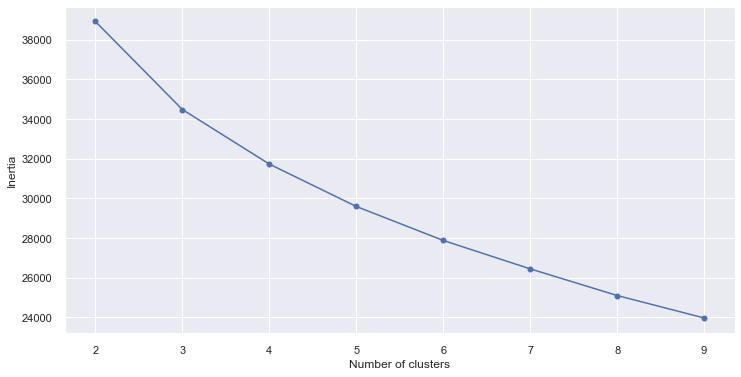

In [49]:
# Plot inertia for multiple cluster solutions against the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(cust_kmeans_scaled_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
cust_df_frame = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(cust_df_frame['Cluster'], cust_df_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [50]:
# Defining the kmeans function with initialization as k-means++; # You want to cluster into 5 segments
kmeans_5 = KMeans(n_clusters = 5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans_5.fit(cust_kmeans_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
# Inertia calculates the sum of all the points within a cluster from the centroid of that cluster.
# Determine inertia on the fitted data
kmeans_5.inertia_

29594.385861106224

In [52]:
pred_clus5 = kmeans_5.predict(cust_kmeans_scaled_df)

In [53]:
cust_df_frame_2 = pd.DataFrame(cust_kmeans_scaled_df)
cust_df_frame_2['cluster'] = pred_clus5
cust_df_frame_2['cluster'].value_counts()

2    1278
3    1204
1    1154
0    1071
4     293
Name: cluster, dtype: int64

In [54]:
# Using head shows the data structure of the resulting data frame
# There are 10 variables used for clustering and their scaled values are shown
# The last column is the cluster solution and shows the cluster to which obsevation belongs
# There are five segments starting from 0 to 4
cust_df_frame_2.head(5)

0         1         2         3         4         5  \
CustomerID                                                                    
3964-QJWTRG-NPN -1.520979  0.139297 -1.004173 -0.429091  0.179061  0.574637   
0648-AIPJSP-UVM -1.408420  0.748913 -1.004173 -0.718046  1.351093 -0.144018   
5195-TLUDJE-HVO  1.124143 -0.165511  0.647020 -0.356852 -0.008464  0.574637   
4459-VLPQUH-3OL -1.352141  0.444105 -1.004173 -0.627747 -0.664801  2.011946   
8158-SMTQFB-CNO -1.183304  0.444105 -0.900974 -0.573568 -1.289885  1.293291   

                        6         7         8         9  cluster  
CustomerID                                                        
3964-QJWTRG-NPN -1.465373 -0.545834  1.042502 -1.808274        0  
0648-AIPJSP-UVM  0.035093 -0.357925  1.042502 -1.808274        0  
5195-TLUDJE-HVO  1.182509  1.168840 -0.959230  0.553014        1  
4459-VLPQUH-3OL -0.097301 -0.584982  1.042502 -1.808274        0  
8158-SMTQFB-CNO -0.759271 -0.815954 -0.959230  0.553014        3

In [199]:
# Get the cluster centroids
print(kmeans_5.cluster_centers_)

[[-0.12413403 -0.32562972 -0.31175119 -0.22706213 -0.25875647  0.08738248
  -0.30656773 -0.36113439 -0.95923036  0.55105396]
 [ 0.69059909  0.50716885  1.16657688  2.80016651  0.05485303 -0.25553388
   0.81439227  0.62509063  0.01402593 -0.06580664]
 [ 1.09381244 -0.43683194  1.13418309 -0.10760971  0.0752819  -0.35476588
   1.10092677  1.01699014 -0.36875382  0.50603291]
 [-0.83879716  0.18369501 -0.71172638 -0.2417321   0.49475499  0.27200963
  -0.65143582 -0.42245818  0.22947372 -1.80827399]
 [-0.32612493  0.43313396 -0.40023772 -0.1213979  -0.2511849   0.06854146
  -0.34565198 -0.36721224  1.04250245  0.55301354]]


In [55]:
# Create a new data column cluster5_2 to incorporate a cluster indicator variable running from 1 to 5
cust_df_frame_2['cluster5_2'] = cust_df_frame_2['cluster'] + 1
cust_df_frame_2.head(5)

0         1         2         3         4         5  \
CustomerID                                                                    
3964-QJWTRG-NPN -1.520979  0.139297 -1.004173 -0.429091  0.179061  0.574637   
0648-AIPJSP-UVM -1.408420  0.748913 -1.004173 -0.718046  1.351093 -0.144018   
5195-TLUDJE-HVO  1.124143 -0.165511  0.647020 -0.356852 -0.008464  0.574637   
4459-VLPQUH-3OL -1.352141  0.444105 -1.004173 -0.627747 -0.664801  2.011946   
8158-SMTQFB-CNO -1.183304  0.444105 -0.900974 -0.573568 -1.289885  1.293291   

                        6         7         8         9  cluster  cluster5_2  
CustomerID                                                                    
3964-QJWTRG-NPN -1.465373 -0.545834  1.042502 -1.808274        0           1  
0648-AIPJSP-UVM  0.035093 -0.357925  1.042502 -1.808274        0           1  
5195-TLUDJE-HVO  1.182509  1.168840 -0.959230  0.553014        1           2  
4459-VLPQUH-3OL -0.097301 -0.584982  1.042502 -1.808274        0           1  
8158-SMTQFB-CNO -0.759271 -0.815954 -0.959230  0.553014        3           4

In [201]:
# Get the cluster labels
print(kmeans_5.labels_)

[3 3 2 ... 2 3 0]


In [61]:
cust_df_frame_2['cluster5_2'].value_counts()

3    1278
4    1204
2    1154
1    1071
5     293
Name: cluster5_2, dtype: int64

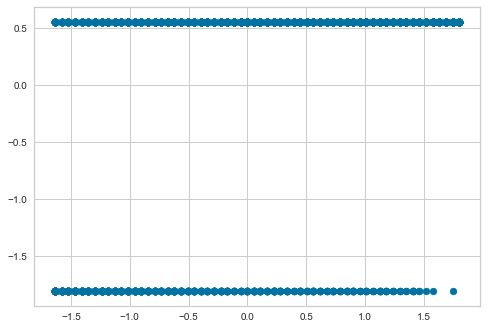

In [204]:
# Plotting the cluster centers and the data points on a 2D plane; Need to think through this
plt.scatter(cust_df_kmeans_scaled[:, 0], cust_df_kmeans_scaled[:, -1])

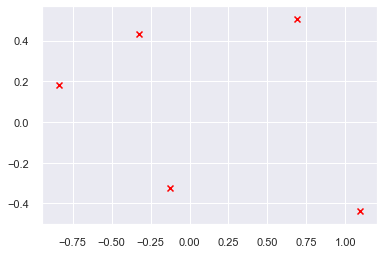

In [57]:
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], c='red', marker='x')

In [58]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(cust_df_frame_2, kmeans.labels_))

0.17417363550673975


/Users/abhijitsanyal/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/abhijitsanyal/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


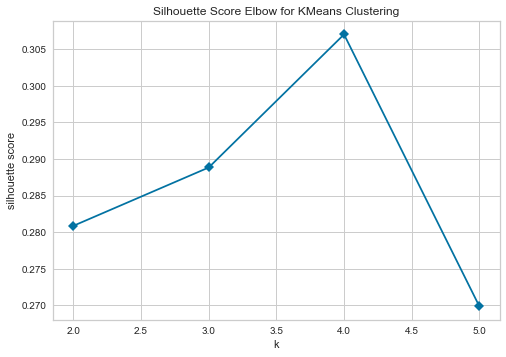

In [59]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(cust_df_frame_2)    
visualizer.poof()  

In [62]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_ALL = pd.DataFrame(pd.concat([cust_df_frame_2, cust_df], axis = 1))
cust_df_clus5_ALL.shape

(5000, 78)

In [63]:
cust_df_clus5_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3964-QJWTRG-NPN to 8027-EXDZBF-OGR
Data columns (total 78 columns):
0                            5000 non-null float64
1                            5000 non-null float64
2                            5000 non-null float64
3                            5000 non-null float64
4                            5000 non-null float64
5                            5000 non-null float64
6                            5000 non-null float64
7                            5000 non-null float64
8                            5000 non-null float64
9                            5000 non-null float64
cluster                      5000 non-null int32
cluster5_2                   5000 non-null int32
Region                       5000 non-null int64
TownSize                     5000 non-null object
Gender                       4967 non-null object
Age                          5000 non-null int64
EducationYears               5000 non-null int64
JobCategory       

In [64]:
# Using pandas crosstabs to create a cross tab of clusters by loan defaults
pd.crosstab(cust_df_clus5_ALL['cluster5_2'],cust_df_clus5_ALL['LoanDefault'],margins=True, normalize = 'columns')

LoanDefault        No       Yes     All
cluster5_2                             
1            0.000000  0.914603  0.2142
2            0.295377  0.019641  0.2308
3            0.333769  0.000000  0.2556
4            0.314181  0.000854  0.2408
5            0.056673  0.064902  0.0586

In [65]:
# Using pandas pivot tables to create a cross tab of DebtToIncomeRatio by clusters by loan defaults by Age

Cluster_Grps = cust_df_clus5_ALL.pivot_table(values=["DebtToIncomeRatio"], index=['cluster5_2','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (Cluster_Grps)

                                    DebtToIncomeRatio
cluster5_2 LoanDefault Age_Recoded                   
1          Yes         18-31                11.807246
                       >31-47               13.852848
                       >47-62               17.231731
                       >62                  18.326667
2          No          >31-47               11.020930
                       >47-62               10.690066
                       >62                  10.112214
           Yes         >31-47               14.700000
                       >47-62               16.458333
                       >62                  18.090000
3          No          18-31                 7.529700
                       >31-47                8.221722
                       >47-62                8.911070
                       >62                   9.981395
4          No          18-31                 7.596226
                       >31-47                8.309579
                       >47-6

In [66]:
#Extracting the cluster data from the original cluster solution and saving it as a DataFrame with an index
cust_df_kmeans_cluster5_2 = pd.DataFrame(cust_df_frame_2['cluster5_2'])
cust_df_kmeans_cluster5_2.head()

cluster5_2
CustomerID                 
3964-QJWTRG-NPN           1
0648-AIPJSP-UVM           1
5195-TLUDJE-HVO           2
4459-VLPQUH-3OL           1
8158-SMTQFB-CNO           4

In [212]:
# Checking on the size and shape of the DataFrame
cust_df_kmeans_cluster5_2.shape

(5000, 1)

In [213]:
cust_df_kmeans.head(5)

Age  EducationYears  EmploymentLength  HHIncome  \
CustomerID                                                         
3964-QJWTRG-NPN   20              15                 0   31000.0   
0648-AIPJSP-UVM   22              17                 0   15000.0   
5195-TLUDJE-HVO   67              14                16   35000.0   
4459-VLPQUH-3OL   23              16                 0   20000.0   
8158-SMTQFB-CNO   26              16                 1   23000.0   

                 DebtToIncomeRatio  HouseholdSize  PhoneCoTenure  \
CustomerID                                                         
3964-QJWTRG-NPN               11.1            3.0              5   
0648-AIPJSP-UVM               18.6            2.0             39   
5195-TLUDJE-HVO                9.9            3.0             65   
4459-VLPQUH-3OL                5.7            5.0             36   
8158-SMTQFB-CNO                1.7            4.0             21   

                 VoiceLastMonth_Coded  OwnsMobileDevice_Coded  LoanDefault_num  
CustomerID                                                                      
3964-QJWTRG-NPN                 19.50                       2                1  
0648-AIPJSP-UVM                 26.70                       2                1  
5195-TLUDJE-HVO                 85.20                       1                2  
4459-VLPQUH-3OL                 18.00                       2                1  
8158-SMTQFB-CNO                  9.15                       1                2

In [67]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_rf = pd.DataFrame(pd.concat([cust_df_kmeans_cluster5_2, cust_df_kmeans], axis = 1))

In [68]:
cust_df_clus5_rf.head()

cluster5_2  Age  EducationYears  EmploymentLength  HHIncome  \
CustomerID                                                                     
3964-QJWTRG-NPN           1   20              15                 0   31000.0   
0648-AIPJSP-UVM           1   22              17                 0   15000.0   
5195-TLUDJE-HVO           2   67              14                16   35000.0   
4459-VLPQUH-3OL           1   23              16                 0   20000.0   
8158-SMTQFB-CNO           4   26              16                 1   23000.0   

                 DebtToIncomeRatio  HouseholdSize  PhoneCoTenure  \
CustomerID                                                         
3964-QJWTRG-NPN               11.1            3.0              5   
0648-AIPJSP-UVM               18.6            2.0             39   
5195-TLUDJE-HVO                9.9            3.0             65   
4459-VLPQUH-3OL                5.7            5.0             36   
8158-SMTQFB-CNO                1.7            4.0             21   

                 VoiceLastMonth_Coded  OwnsMobileDevice_Coded  LoanDefault_num  
CustomerID                                                                      
3964-QJWTRG-NPN                 19.50                       2                1  
0648-AIPJSP-UVM                 26.70                       2                1  
5195-TLUDJE-HVO                 85.20                       1                2  
4459-VLPQUH-3OL                 18.00                       2                1  
8158-SMTQFB-CNO                  9.15                       1                2

In [69]:
cust_df_clus5_rf.shape

(5000, 11)

In [70]:
# Check on the cluster distribution after extractiona and concatenating
cust_df_clus5_rf['cluster5_2'].value_counts()

3    1278
4    1204
2    1154
1    1071
5     293
Name: cluster5_2, dtype: int64

In [ ]:
def split_data(df, train_perc = 0.8):
    df['train'] = np.random.rand(len(df)) < train_perc
    train = df[df.train == 1]
    test = df[df.train == 0]
    split_data ={'train': train, 'test': test}
    return split_data

In [73]:
#split_data(cust_df_kmeans,0.8)

In [71]:
probs = np.random.rand(len(cust_df_clus5_rf))
training_set = probs < 0.8
test_set = (probs>=0.8)

cust_df_kmeans_clus_5_trg = cust_df_clus5_rf[training_set]
cust_df_kmeans_clus_5_tst = cust_df_clus5_rf[test_set]

In [80]:
# Removing the y variable - cluster5_2 from the training data set
cust_df_kmeans_clus_5_trg2 = cust_df_kmeans_clus_5_trg.drop('cluster5_2', 1)
cust_df_kmeans_clu_5_Y = pd.DataFrame(cust_df_kmeans_clus_5_trg['cluster5_2'])
cust_df_kmeans_clus_5_trg2.head()

Age  EducationYears  EmploymentLength  HHIncome  \
CustomerID                                                         
3964-QJWTRG-NPN   20              15                 0   31000.0   
0648-AIPJSP-UVM   22              17                 0   15000.0   
5195-TLUDJE-HVO   67              14                16   35000.0   
4459-VLPQUH-3OL   23              16                 0   20000.0   
9662-FUSYIM-1IV   64              17                22  107000.0   

                 DebtToIncomeRatio  HouseholdSize  PhoneCoTenure  \
CustomerID                                                         
3964-QJWTRG-NPN               11.1            3.0              5   
0648-AIPJSP-UVM               18.6            2.0             39   
5195-TLUDJE-HVO                9.9            3.0             65   
4459-VLPQUH-3OL                5.7            5.0             36   
9662-FUSYIM-1IV                5.6            1.0             28   

                 VoiceLastMonth_Coded  OwnsMobileDevice_Coded  LoanDefault_num  
CustomerID                                                                      
3964-QJWTRG-NPN                  19.5                       2                1  
0648-AIPJSP-UVM                  26.7                       2                1  
5195-TLUDJE-HVO                  85.2                       1                2  
4459-VLPQUH-3OL                  18.0                       2                1  
9662-FUSYIM-1IV                  24.3                       1                2

In [79]:
# Removing the y variable - cluster5_2 from the testing data set
cust_df_kmeans_clus_5_tst2 = cust_df_kmeans_clus_5_tst.drop('cluster5_2', 1)
cust_df_kmeans_clu_5_Y_tst = pd.DataFrame(cust_df_kmeans_clus_5_tst['cluster5_2'])
cust_df_kmeans_clus_5_tst2.head()

Age  EducationYears  EmploymentLength  HHIncome  \
CustomerID                                                         
8158-SMTQFB-CNO   26              16                 1   23000.0   
7432-QKQFJJ-K72   52              14                10   77000.0   
9124-DZALHM-S6I   66              12                15   16000.0   
3512-MUWBGY-52X   47              11                19   84000.0   
0649-TBFJFL-QU4   63              14                29  424000.0   

                 DebtToIncomeRatio  HouseholdSize  PhoneCoTenure  \
CustomerID                                                         
8158-SMTQFB-CNO                1.7            4.0             21   
7432-QKQFJJ-K72                1.9            1.0             15   
9124-DZALHM-S6I                2.6            1.0             53   
3512-MUWBGY-52X                4.1            2.0              3   
0649-TBFJFL-QU4               10.7            2.0             70   

                 VoiceLastMonth_Coded  OwnsMobileDevice_Coded  LoanDefault_num  
CustomerID                                                                      
8158-SMTQFB-CNO                  9.15                       1                2  
7432-QKQFJJ-K72                 11.40                       2                2  
9124-DZALHM-S6I                 63.15                       1                2  
3512-MUWBGY-52X                 10.95                       1                2  
0649-TBFJFL-QU4                104.40                       1                2

In [226]:
cust_df_kmeans_clu_5_Y.head()

cluster5_2
CustomerID                 
3964-QJWTRG-NPN           4
0648-AIPJSP-UVM           4
5195-TLUDJE-HVO           3
8158-SMTQFB-CNO           1
9662-FUSYIM-1IV           1

In [76]:
cust_df_kmeans_clus_5_trg2.shape

(4030, 10)

In [77]:
cust_df_kmeans_clus_5_tst.shape

(970, 11)

In [81]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_5 = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_5.fit(cust_df_kmeans_clus_5_trg2, cust_df_kmeans_clu_5_Y)

cust_df_kmeans_clu_5_Y_pred = clf_5.predict(cust_df_kmeans_clus_5_tst2)

/Users/abhijitsanyal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(cust_df_kmeans_clu_5_Y_tst, cust_df_kmeans_clu_5_Y_pred))

Accuracy: 0.9556701030927836


In [83]:
# Create a list of feature names
feature_names = list(cust_df_kmeans_clus_5_trg2.columns)

In [84]:
# Compute feature importances for the features used in the RF model
feature_imp = pd.Series(clf_5.feature_importances_,index = feature_names).sort_values(ascending=False)
feature_imp

LoanDefault_num           0.277130
OwnsMobileDevice_Coded    0.220974
EmploymentLength          0.106554
PhoneCoTenure             0.103916
HHIncome                  0.089344
VoiceLastMonth_Coded      0.073305
Age                       0.071035
EducationYears            0.024604
DebtToIncomeRatio         0.024095
HouseholdSize             0.009042
dtype: float64

No handles with labels found to put in legend.


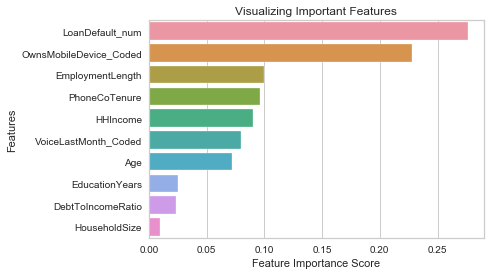

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [85]:
# Printing a confusion matrix for the test data
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(cust_df_kmeans_clu_5_Y_tst, cust_df_kmeans_clu_5_Y_pred)
print(conf_mat)

[[218   0   0   0   0]
 [  4 200   5   9   3]
 [  0   6 241   0   0]
 [  0   4   0 220   0]
 [  1  11   0   0  48]]
